<a href="https://colab.research.google.com/github/skywalker0803r/mxnet_course/blob/master/mxnet_ndarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install mxnet
import seaborn as sns
from mxnet import nd

In [2]:
X = nd.arange(12)
X


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

In [3]:
X.shape

(12,)

In [4]:
X.size

12

In [5]:
X = X.reshape(3,4)
X


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

In [6]:
nd.zeros((2, 3, 4))


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
<NDArray 2x3x4 @cpu(0)>

In [7]:
nd.ones((3, 4))


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @cpu(0)>

In [8]:
Y = nd.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
Y


[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
<NDArray 3x4 @cpu(0)>

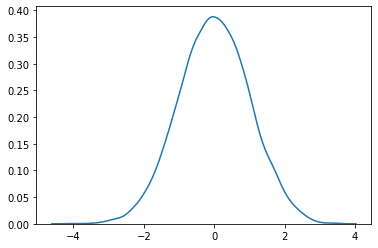

In [9]:
sns.kdeplot(nd.random.normal(0,1, shape=(10000,)).asnumpy())

In [10]:
X + Y


[[ 2.  2.  6.  6.]
 [ 5.  7.  9. 11.]
 [12. 12. 12. 12.]]
<NDArray 3x4 @cpu(0)>

In [11]:
X * Y


[[ 0.  1.  8.  9.]
 [ 4. 10. 18. 28.]
 [32. 27. 20. 11.]]
<NDArray 3x4 @cpu(0)>

In [12]:
X - Y


[[-2.  0. -2.  0.]
 [ 3.  3.  3.  3.]
 [ 4.  6.  8. 10.]]
<NDArray 3x4 @cpu(0)>

In [13]:
X / Y


[[ 0.    1.    0.5   1.  ]
 [ 4.    2.5   2.    1.75]
 [ 2.    3.    5.   11.  ]]
<NDArray 3x4 @cpu(0)>

In [17]:
X.log()


[[     -inf 0.        0.6931472 1.0986123]
 [1.3862944 1.609438  1.7917595 1.9459101]
 [2.0794415 2.1972246 2.3025851 2.3978953]]
<NDArray 3x4 @cpu(0)>

In [18]:
Y.exp()


[[ 7.389056   2.7182817 54.59815   20.085537 ]
 [ 2.7182817  7.389056  20.085537  54.59815  ]
 [54.59815   20.085537   7.389056   2.7182817]]
<NDArray 3x4 @cpu(0)>

In [19]:
nd.dot(X, Y.T)


[[ 18.  20.  10.]
 [ 58.  60.  50.]
 [ 98. 100.  90.]]
<NDArray 3x3 @cpu(0)>

In [21]:
nd.concat(X, Y, dim=0)


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [ 2.  1.  4.  3.]
 [ 1.  2.  3.  4.]
 [ 4.  3.  2.  1.]]
<NDArray 6x4 @cpu(0)>

In [22]:
nd.concat(X, Y, dim=1)


[[ 0.  1.  2.  3.  2.  1.  4.  3.]
 [ 4.  5.  6.  7.  1.  2.  3.  4.]
 [ 8.  9. 10. 11.  4.  3.  2.  1.]]
<NDArray 3x8 @cpu(0)>

In [23]:
X == Y


[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

In [28]:
X.sum()


[66.]
<NDArray 1 @cpu(0)>

In [29]:
X.norm().asscalar()

22.494442

# 廣播機制

In [30]:
A = nd.arange(3).reshape((3, 1))
B = nd.arange(2).reshape((1, 2))
A, B

(
 [[0.]
  [1.]
  [2.]]
 <NDArray 3x1 @cpu(0)>, 
 [[0. 1.]]
 <NDArray 1x2 @cpu(0)>)

In [31]:
A + B


[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>

In [34]:
X


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

In [35]:
X[1:3]


[[ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 2x4 @cpu(0)>

In [36]:
X[1, 2]


[6.]
<NDArray 1 @cpu(0)>

In [39]:
X[1:2,:] 


[[4. 5. 6. 7.]]
<NDArray 1x4 @cpu(0)>

# MEMORY

In [40]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [44]:
Z = Y.zeros_like()
print(Z)
before = id(Z)
Z[:] = X + Y
id(Z) == before


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>


True

In [45]:
nd.elemwise_add(X, Y, out=Z)
id(Z) == before

True

In [46]:
before = id(X)
X += Y
id(X) == before

True

# NDArray和NumPy相互变换¶

In [47]:
import numpy as np

P = np.ones((2, 3))
D = nd.array(P)
D


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [48]:
D.asnumpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)